In [1]:
dataPath = 'data/'

In [16]:
import scipy.io
import scipy.signal
import os
import numpy as np
from matplotlib import pyplot as plt  
from scipy.fft import fft, fftfreq, irfft, ifft, rfft, rfftfreq
from scipy.ndimage import gaussian_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import linalg
from numpy.linalg import norm
import shutil

In [3]:
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    D = lam * D.dot(D.transpose())
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w)
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10, full_output=False):
    L = len(y)

    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2*diag, diag], [0, -1, -2], L, L - 2)

    H = lam * D.dot(D.T) 

    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)

    crit = 1
    count = 0

    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]

        m = np.mean(dn)
        s = np.std(dn)

        w_new = 1 / (1 + np.exp(2 * (d - (2*s - m))/s))

        crit = norm(w_new - w) / norm(w)

        w = w_new
        W.setdiag(w)

        count += 1

        if count > niter:
            break

    if full_output:
        info = {'num_iter': count, 'stop_criterion': crit}
        return z, d, info
    else:
        return z

In [4]:
folders = os.listdir(path=dataPath)
filenames = [dataPath+folder+'/'+filename for folder in folders for filename in os.listdir(path=dataPath+folder)]

In [5]:
records = [scipy.io.loadmat(filename) for filename in filenames]
traces1 = [record[[*record.keys()][-3]] for record in records]
traces2 = [record[[*record.keys()][-2]] for record in records]
traces3 = [record[[*record.keys()][-1]] for record in records]

In [8]:
h100 = []
h200 = []
h300 = []
h400 = []
h500 = []
h1000 = []
for i in range(len(filenames)):
    if ' h 100 ' in filenames[i] or ' h 100.' in filenames[i] or ' healthy 100 ' in filenames[i] or ' healthy 100.' in filenames[i]:
        h100.append(filenames[i])
    if ' h 200 ' in filenames[i] or ' h 200.' in filenames[i] or ' healthy 200 ' in filenames[i] or ' healthy 200.' in filenames[i]:
        h200.append(filenames[i])
    if ' h 300 ' in filenames[i] or ' h 300.' in filenames[i] or ' healthy 300 ' in filenames[i] or ' healthy 300.' in filenames[i]:
        h300.append(filenames[i])
    if ' h 400 ' in filenames[i] or ' h 400.' in filenames[i] or ' healthy 400 ' in filenames[i] or ' healthy 400.' in filenames[i]:
        h400.append(filenames[i])
    if ' h 500 ' in filenames[i] or ' h 500.' in filenames[i] or ' healthy 500 ' in filenames[i] or ' healthy 500.' in filenames[i]:
        h500.append(filenames[i])
    if ' h 1000 ' in filenames[i] or ' h 1000.' in filenames[i] or ' healthy 1000 ' in filenames[i] or ' healthy 1000.' in filenames[i]:
        h1000.append(filenames[i])

In [26]:
"""
os.makedirs("h/100")
for path in h100:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/100/'+name)
os.makedirs("h/200")
for path in h200:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/200/'+name)
os.makedirs("h/300")
for path in h300:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/300/'+name)
os.makedirs("h/400")
for path in h400:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/400/'+name)
os.makedirs("h/500")
for path in h500:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/500/'+name) 
os.makedirs("h/1000")
for path in h1000:
    name = path.split('/')[-1]
    shutil.copyfile(path, 'h/1000/'+name)  
"""

In [30]:
records100 = [scipy.io.loadmat(filename) for filename in h100]

In [176]:
ca1100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1100.append(rec[str(k)][:,1])
ca1100 = np.array(ca1100)
ca3100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3100.append(rec[str(k)][:,1])
ca3100 = np.array(ca3100)

In [142]:
normca1100 = np.array([(rec-rec.mean())/rec.std() for rec in ca1100])
normca3100 = np.array([(rec-rec.mean())/rec.std() for rec in ca3100])

In [86]:
maxlen = len(ca1100[0])
minlen = len(ca1100[0])
for rec in ca1100:
    if len(rec)>maxlen:
        maxlen = len(rec)
    if len(rec)<minlen:
        minlen = len(rec)

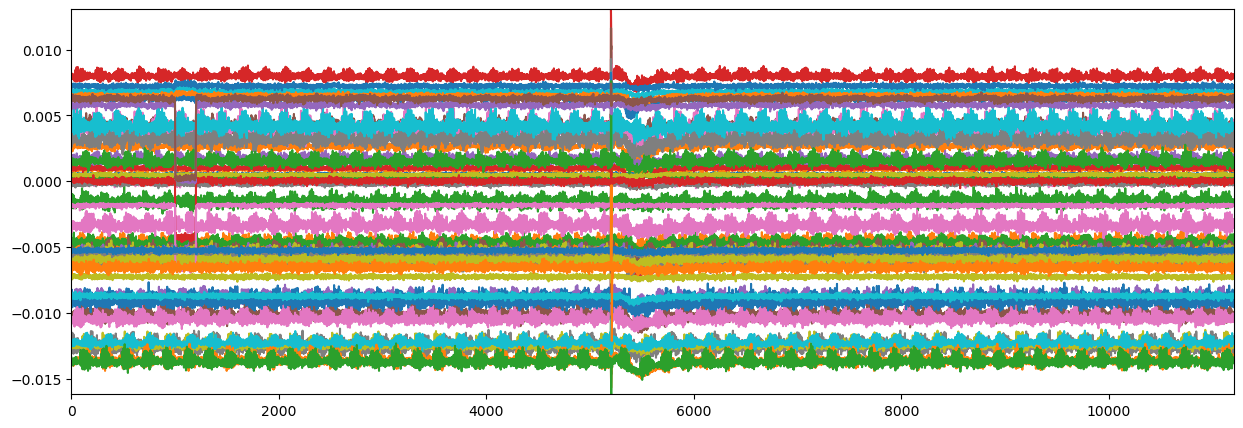

In [140]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(ca1100), np.max(ca1100)])
plt.xlim([0, maxlen])
for rec in ca1100:
    plt.plot(rec) 
plt.show()  

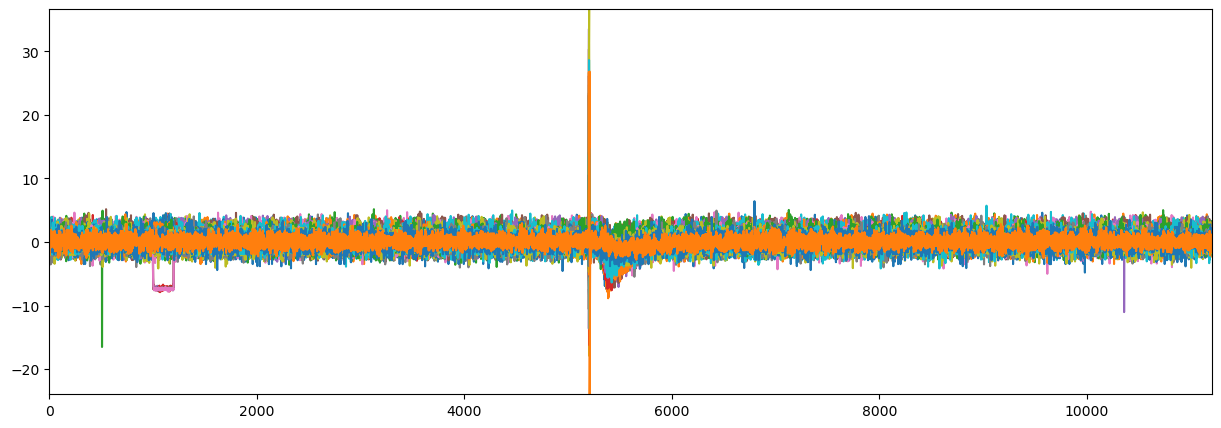

In [143]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normca1100), np.max(normca1100)])
plt.xlim([0, maxlen])
for rec in normca1100:
    plt.plot(rec) 
plt.show()  

In [119]:
meanLine = sum(ca1100)/len(ca1100)
normMeanLine = sum(normca1100)/len(normca1100)

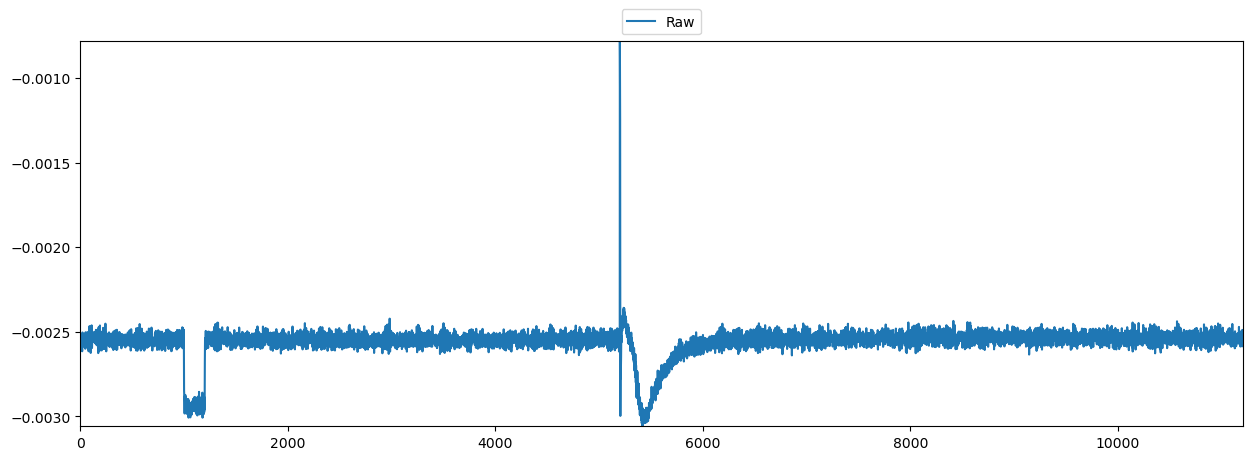

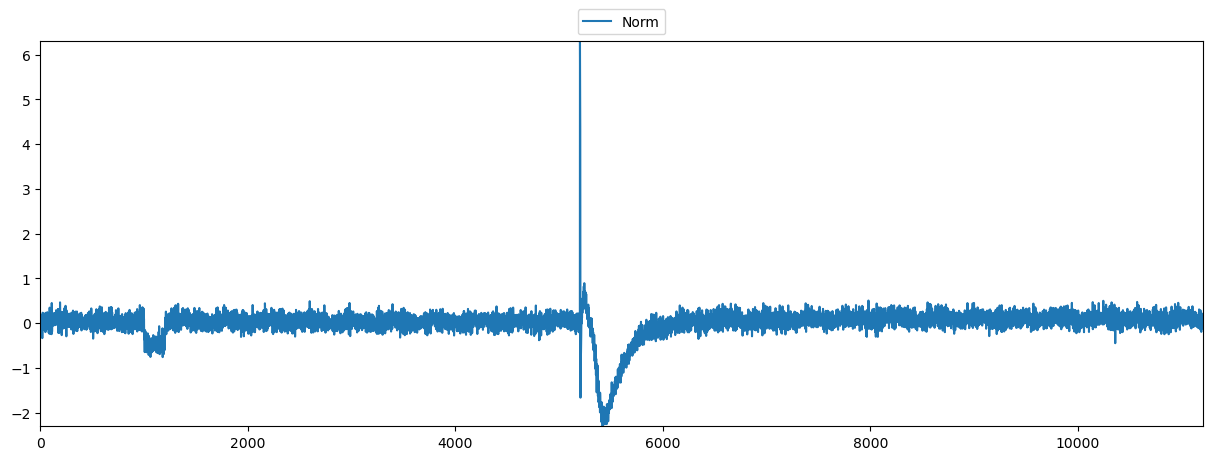

In [121]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(meanLine), np.max(meanLine)])
plt.xlim([0, maxlen])
plt.plot(meanLine, label="Raw") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normMeanLine), np.max(normMeanLine)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine, label="Norm") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [241]:
def removeArts(signal):
    s = signal.copy()
    mean = np.mean(signal[2000:4000])
    signalExt = np.argmax(signal) if np.abs(np.max(signal)-mean)>np.abs(np.min(signal)-mean) else np.argmin(signal)
    """
    for i in range(100):
        t = np.argmax(s) if np.abs(np.max(s)-mean)>np.abs(np.min(s)-mean) else np.argmin(s)
        s[t] = mean
        newT = np.argmax(s) if np.abs(np.max(s)-mean)>np.abs(np.min(s)-mean) else np.argmin(s)         
        if np.abs(newT-signalExt)>100:
            break
    """
    ext = s[signalExt]
    s[signalExt] = mean
    t = signalExt + 1
    while abs(s[t]-ext)<abs(s[t]-mean):
        s[t] = mean
        t = t + 1
    t = signalExt - 1
    while abs(s[t]-ext)<abs(s[t]-mean):
        s[t] = mean
        t = t - 1
    """
    for j in range(200):
        s[signalExt-(j+1)] = mean
        s[signalExt+(j+1)] = mean
    """
    return s


In [242]:
wa1100 = np.array([removeArts(rec) for rec in ca1100])
wa3100 = np.array([removeArts(rec) for rec in ca3100])

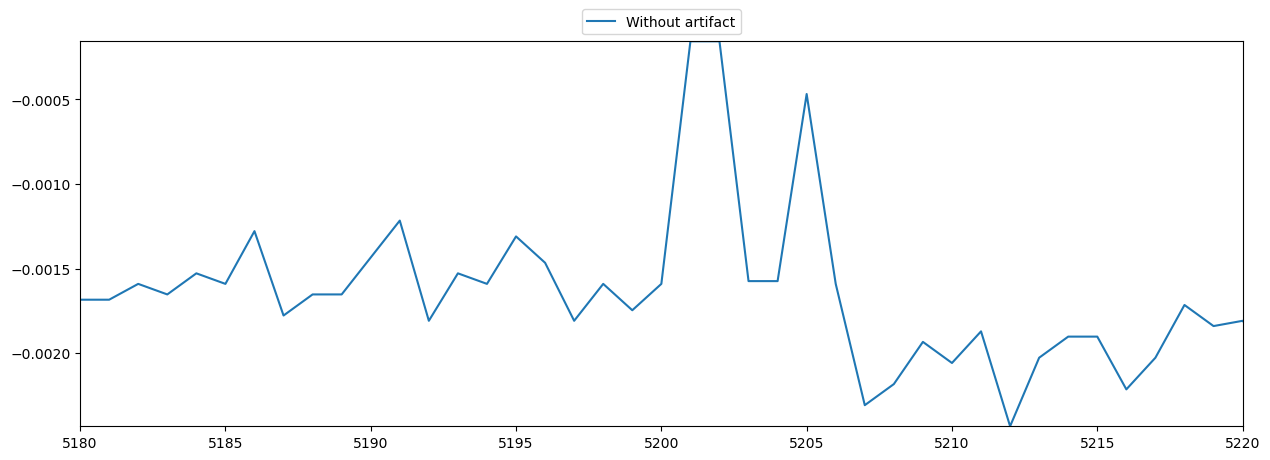

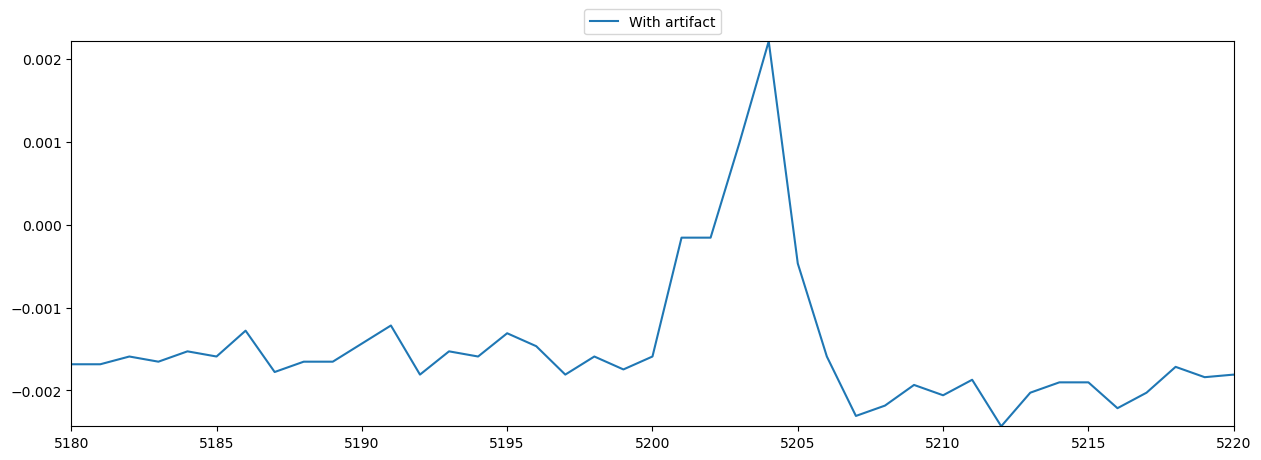

In [246]:
number = 2
left = 5180
right = 5220
plt.figure(figsize=(15, 5))
plt.ylim([np.min(wa1100[number][left:right]), np.max(wa1100[number][left:right])])
plt.xlim([left, right])
plt.plot(wa1100[number], label="Without artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(figsize=(15, 5))
plt.ylim([np.min(ca1100[number][left:right]), np.max(ca1100[number][left:right])])
plt.xlim([left, right])
plt.plot(ca1100[number], label="With artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

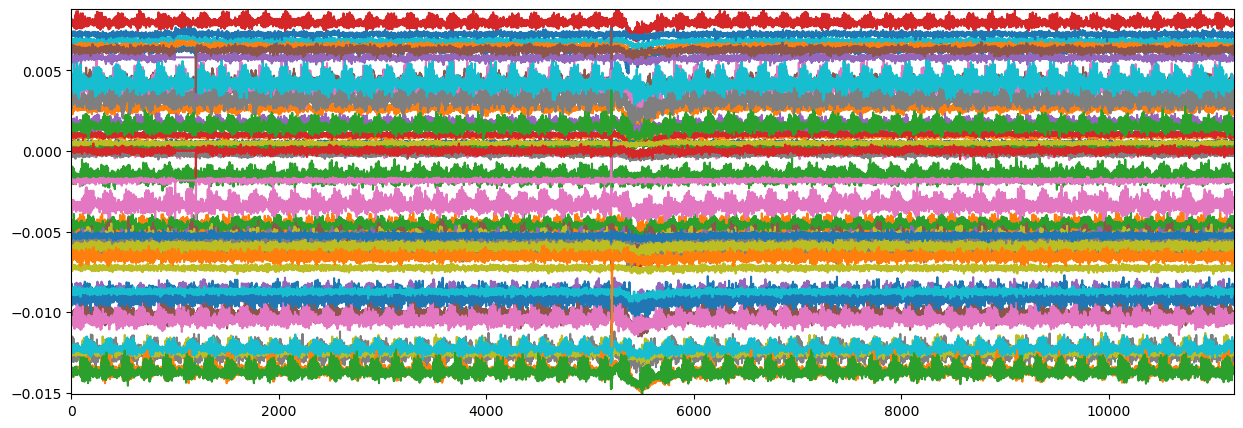

In [247]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(wa1100), np.max(wa1100)])
plt.xlim([0, maxlen])
for rec in wa1100:
    plt.plot(rec) 
plt.show()  

In [248]:
normca1100 = np.array([(rec-rec.mean())/rec.std() for rec in wa1100])
normca3100 = np.array([(rec-rec.mean())/rec.std() for rec in wa3100])

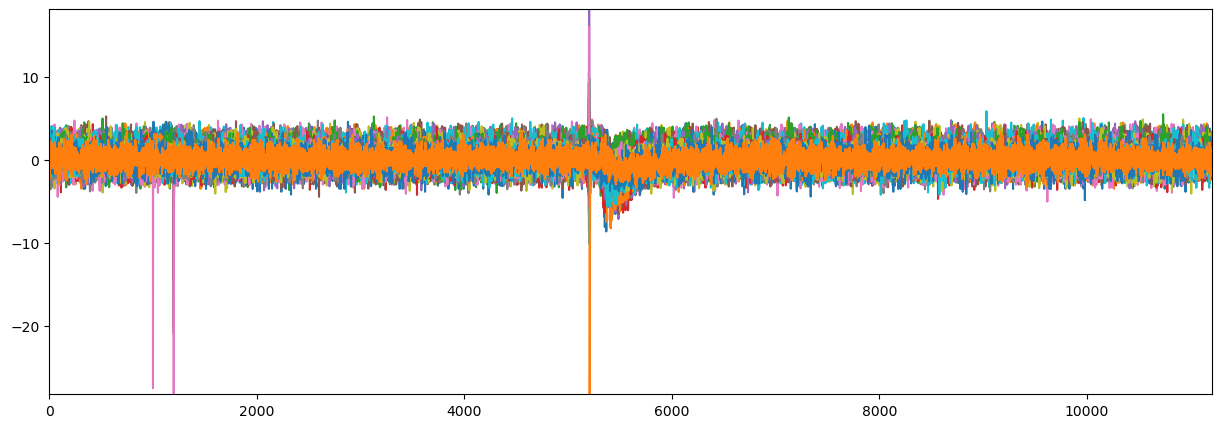

In [249]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normca1100), np.max(normca1100)])
plt.xlim([0, maxlen])
for rec in normca1100:
    plt.plot(rec) 
plt.show()  

In [250]:
meanLine = sum(wa1100)/len(wa1100)
normMeanLine = sum(normca1100)/len(normca1100)

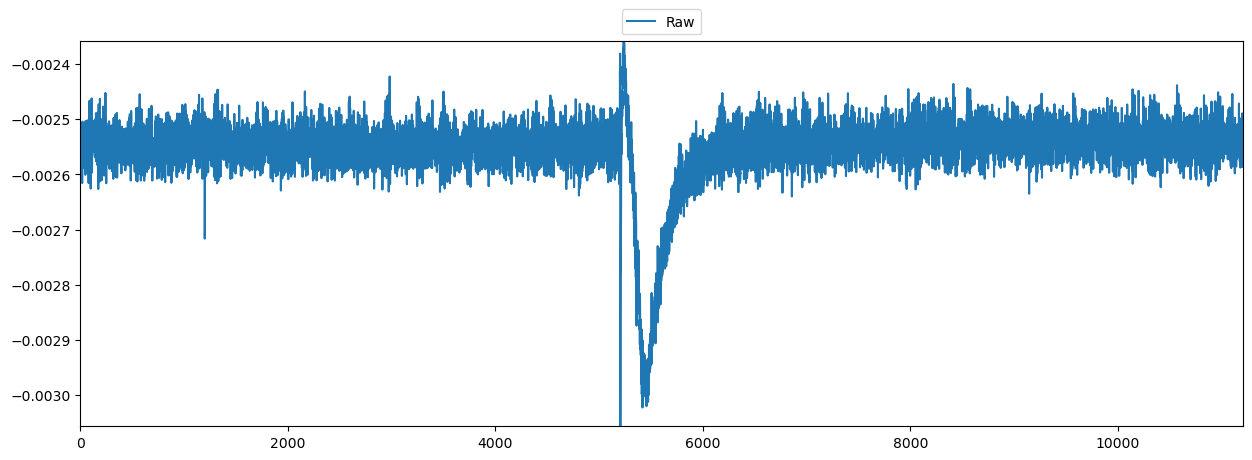

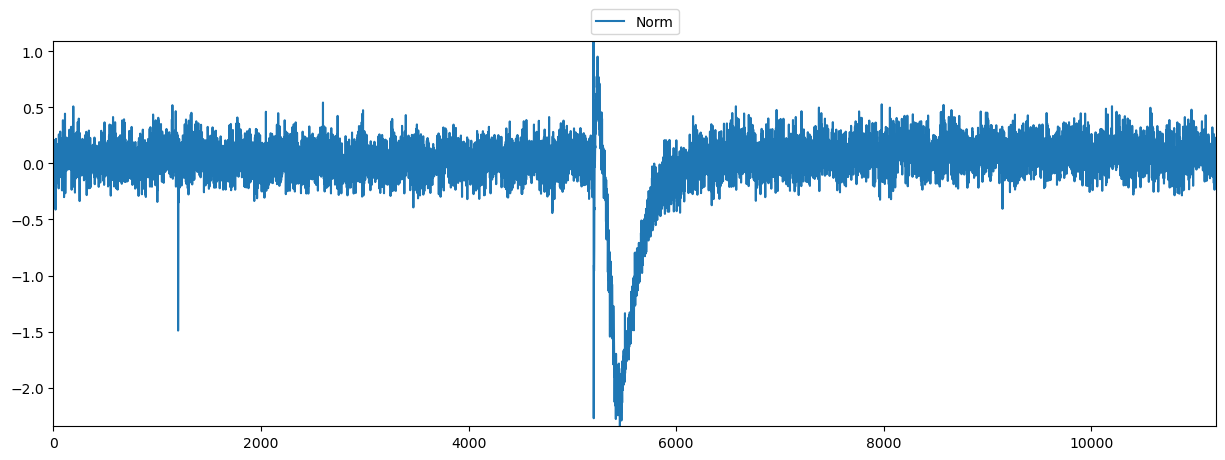

In [255]:
left = 0
right = maxlen
plt.figure(figsize=(15, 5))
plt.ylim([np.min(meanLine[left:right]), np.max(meanLine[left:right])])
plt.xlim([left, right])
plt.plot(meanLine, label="Raw") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normMeanLine[left:right]), np.max(normMeanLine[left:right])])
plt.xlim([left, right])
plt.plot(normMeanLine, label="Norm") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

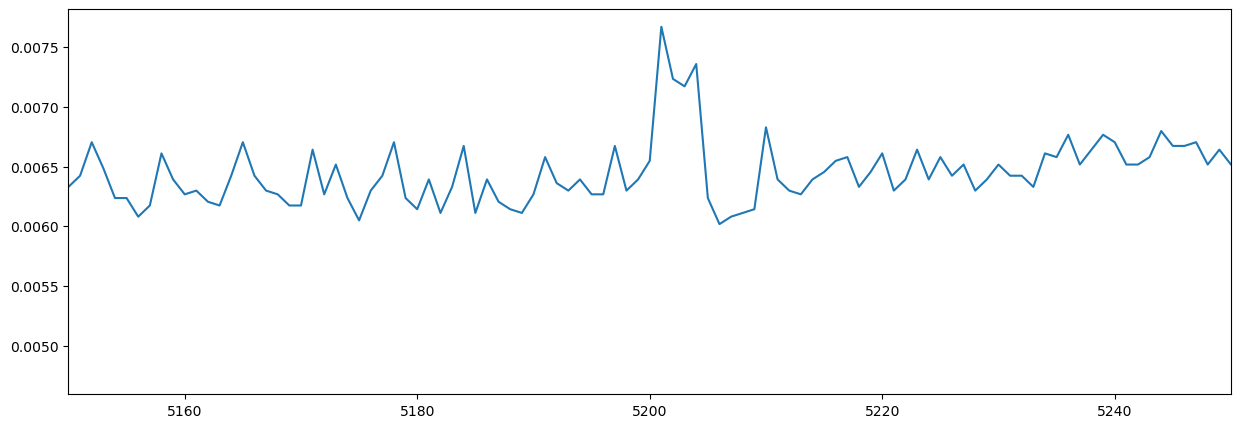

In [179]:
plt.figure(figsize=(15, 5))
#plt.ylim([np.min(ca1100[0]), np.max(ca1100[0])])
plt.xlim([0, maxlen])
plt.xlim([5150, 5250])
plt.plot(ca1100[0]) 
#plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [122]:
maxlen = len(ca3100[0])
minlen = len(ca3100[0])
for rec in ca3100:
    if len(rec)>maxlen:
        maxlen = len(rec)
    if len(rec)<minlen:
        minlen = len(rec)

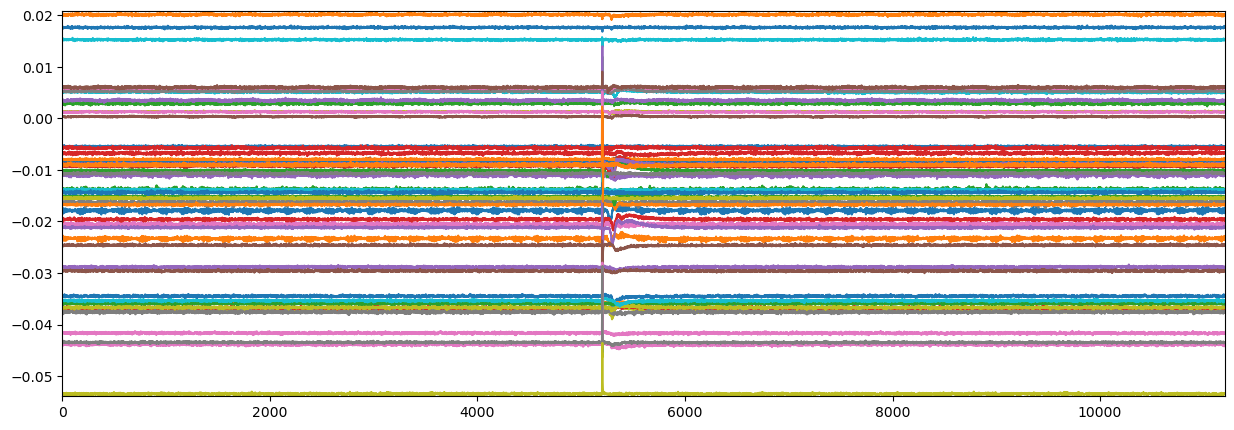

In [124]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(ca3100), np.max(ca3100)])
plt.xlim([0, maxlen])
for rec in ca3100:
    plt.plot(rec) 
plt.show()  

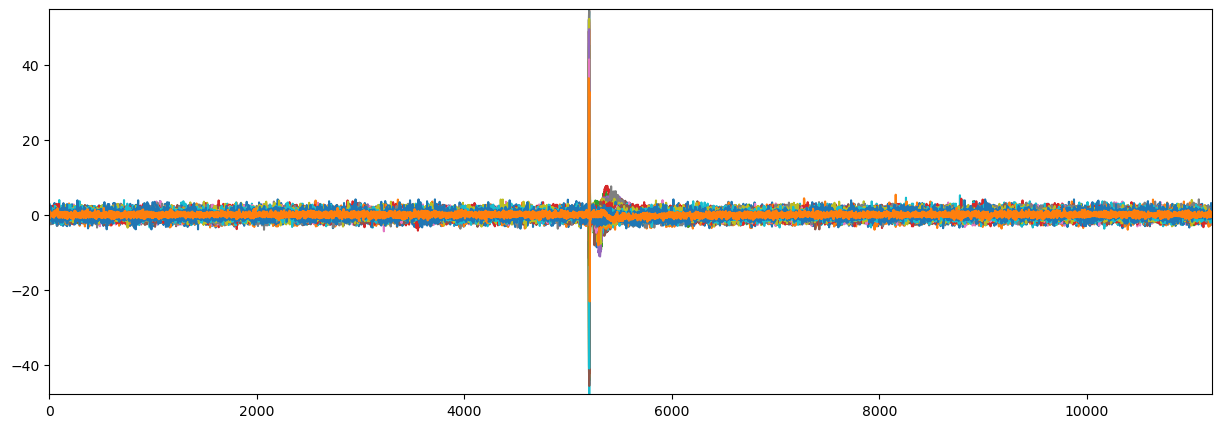

In [127]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normca3100), np.max(normca3100)])
plt.xlim([0, maxlen])
for rec in normca3100:
    plt.plot(rec) 
plt.show()  

In [128]:
meanLine = sum(ca3100)/len(ca3100)
normMeanLine = sum(normca3100)/len(normca3100)

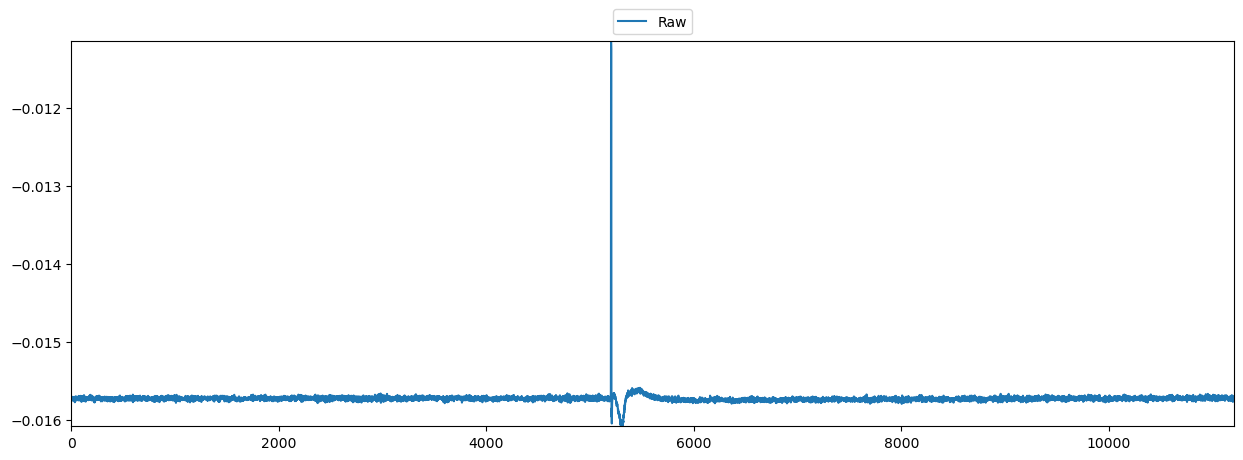

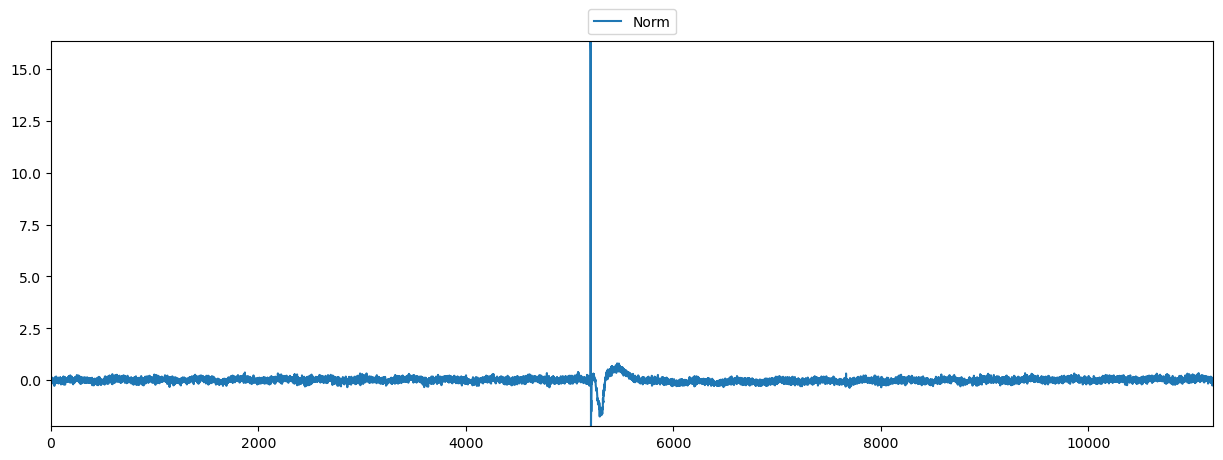

In [129]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(meanLine), np.max(meanLine)])
plt.xlim([0, maxlen])
plt.plot(meanLine, label="Raw") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(figsize=(15, 5))
plt.ylim([np.min(normMeanLine), np.max(normMeanLine)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine, label="Norm") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
"""
for i, record in enumerate(records):
    for key in record.keys(): 
        if 'Trace_1_9_1_3' in key:
            print(i)
"""

In [ ]:
"""
f, t, Sxx = scipy.signal.spectrogram(signal, 20000)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim(2750, 3500)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
"""

In [ ]:
number = 0
trace = h1[number]
signal = trace[:,1]
time = trace[:,0]

In [ ]:
b, a = scipy.signal.butter(3, 0.1)
filtered1 = scipy.signal.filtfilt(b, a, signal, method="gust")

In [ ]:
b, a = scipy.signal.iirfilter(4, Wn=7, fs=50, btype="low", ftype="butter")
filtered2 = scipy.signal.lfilter(b, a, signal)

In [ ]:
windowSize = 20
window = np.hanning(windowSize)
window = window / window.sum()
filteredSignal = np.convolve(window, signal, mode='valid')
filtered3 = [np.mean(filteredSignal) for s in signal]
startIndex = int(windowSize/2)
for i in range(startIndex, startIndex+len(filteredSignal)):
    filtered3[i]=filteredSignal[i-startIndex]

In [ ]:
filtered4 = gaussian_filter(signal, 2)

In [ ]:
filtered4 = gaussian_filter(signal, 2)
plt.figure(figsize=(15, 5))
plt.ylim([np.min(signal), np.max(signal)])
plt.xlim([np.min(time), np.max(time)])
plt.xlim([0.255, 0.2675])
plt.plot(time,signal, label="Raw") 
#plt.plot(time,filtered1, label="Gust") 
#plt.plot(time,filtered2, label="LFilt")
#plt.plot(time,filtered3, label="Conv")
plt.plot(time,filtered4, label="Gaus")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
number = 0
trace = h1[number]
signal = trace[:,1]
time = trace[:,0]
gaus = gaussian_filter(signal, 10)

baseline = baseline_als(signal, 10000, 0.05)
baseline2 = baseline_arPLS(signal)

signal = gaus

s = gaus.copy()
startAnswer = 0
for i in range(10):
    startAnswer = np.argmax(s)
    s[np.argmax(s)] = np.mean(baseline)
    if np.abs(np.argmax(s)-np.argmax(baseline))>10:
        break
s = signal[startAnswer:]

median = np.median(signal)
minS = np.min(s)
maxS = np.max(s)

start = 0
if np.abs(minS-median)>np.abs(maxS-median):
    print("MIN")
    end = np.argmin(s)
    while end<len(s)-1 and (s[end]<median):
        end = end+1
    """
    start = np.argmin(s)
    while start>0 and (s[start]<median):
        start = start-1
    """
else:
    print("MAX")
    end = np.argmax(s)
    while end<len(s)-1 and (s[end]>median):
        end = end+1
    """
    start = np.argmax(s)
    while start>0 and (s[start]>median):
        start = start-1
    """
answer = s[start:end+1]      

startAnswer = startAnswer + start
endAnswer = startAnswer+len(answer)

timeAnswer = time[startAnswer:endAnswer]
gausAnswer = gaussian_filter(answer, 2)

answer = trace[:,1][startAnswer:endAnswer]    
signal = trace[:,1]
base = baseline2[startAnswer:endAnswer]

plt.figure(figsize=(15, 5))
plt.ylim([np.min(signal), np.max(signal)])
plt.xlim([np.min(time), np.max(time)])
#plt.xlim([0.25, 0.275])
plt.plot(time,signal, label="Raw") 
plt.plot(time,gaus, label="Gaus")
plt.plot(time,[np.mean(signal) for s in signal], label="Mean")
plt.plot(time,[np.median(signal) for s in signal], label="Median")
plt.plot(time,baseline, label="Baseline")
plt.plot(time,baseline2, label="Baseline2")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(figsize=(15, 5))
plt.ylim([np.min(answer), np.max(answer)])
plt.xlim([np.min(timeAnswer), np.max(timeAnswer)])
plt.plot(timeAnswer,answer, label="Raw") 
plt.plot(timeAnswer,gausAnswer, label="Gaus")
plt.plot(timeAnswer,[np.mean(signal) for s in answer], label="Mean")
plt.plot(timeAnswer,[np.median(signal) for s in answer], label="Median")
plt.plot(timeAnswer,base, label="Baseline")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show() 
print(len(answer))